In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib as mpl
from utility import cart_to_sphe, sphe_to_cart, calculate_inter_angle_to_camera, get_sensor_filter
import itertools

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 14

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
src_dir = "../dats/"
diff = [20, 0, 0]
file_name = "ppc_log_x_%.2f_y_%.2f_z_%.2f_0.dat" % (diff[0], diff[1], diff[2])
dom_radius = 0.16510
camera_pos_sphe = np.array([0, np.pi/2])
camera_normal_vec = sphe_to_cart(camera_pos_sphe)
camera_pos_rad = dom_radius - 0.02 # Assume 5 cm apart from DOM boundary
camera_lens_rad = 0.005 * 10
opening_angle = np.pi * 2 / 3 # = 22.86 when the camera opening angle is 120 degree(Using sin's law)

In [107]:
data = np.fromfile(src_dir + file_name, dtype='<f4')
photon_log = data.reshape(-1, 8)
momentum= photon_log[:,5:3:-1]
direction = photon_log[:,5:3:-1]

## Draw raw arrival momentum 

Text(0.5,1,'Momentum of the photon interval]')

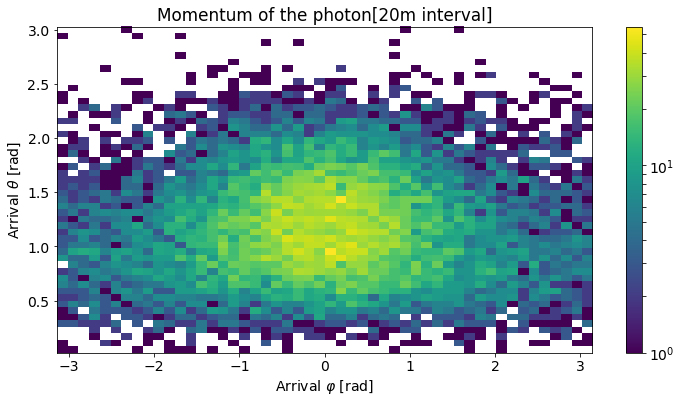

In [108]:
fig, ax = plt.subplots(figsize=(12, 6))
h = plt.hist2d(momentum[:,0], momentum[:,1], bins=50, norm=LogNorm());
plt.colorbar(h[3])
plt.xlabel("Arrival %s [rad]" % (r'$\varphi$'))
plt.ylabel("Arrival %s [rad]" % (r'$\theta$'))
plt.title('Momentum of the photon[20m interval]')

## Find the maximum range(opening angle)

In [109]:
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(-np.pi, np.pi, 100)
test_cases = np.array(list(itertools.product(phi, theta)))
test_angle = calculate_inter_angle_to_camera(camera_normal_vec, -sphe_to_cart(test_cases))

Text(0.5,1,'Possible momentum region under opening angle 120$\\degree$')

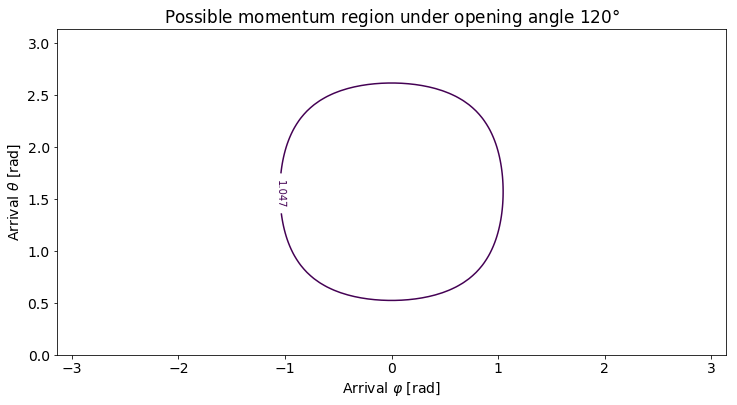

In [110]:
half_opening_angle = opening_angle / 2
fig, ax = plt.subplots(figsize=(12, 6))
CS = plt.contour(test_angle.reshape(100, 100).T, levels = [half_opening_angle], extent=[-np.pi, np.pi, 0, np.pi])
# CS = plt.contour(test_angle.reshape(100, 100), levels = [half_opening_angle])
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel("Arrival %s [rad]" % (r'$\varphi$'))
plt.ylabel("Arrival %s [rad]" % (r'$\theta$'))
plt.title('Possible momentum region under opening angle 120$\degree$')

## Check photon arrive in lens or not

In [111]:
sensor_filter = get_sensor_filter(direction, momentum, camera_pos_sphe, camera_lens_rad=camera_lens_rad)

### Do the filtering
To get the filtered data on the sensor, we will apply the effective area

In [112]:
filtered_momentum = momentum[sensor_filter]

Text(0.5,1,'Photons on the lens interval]')

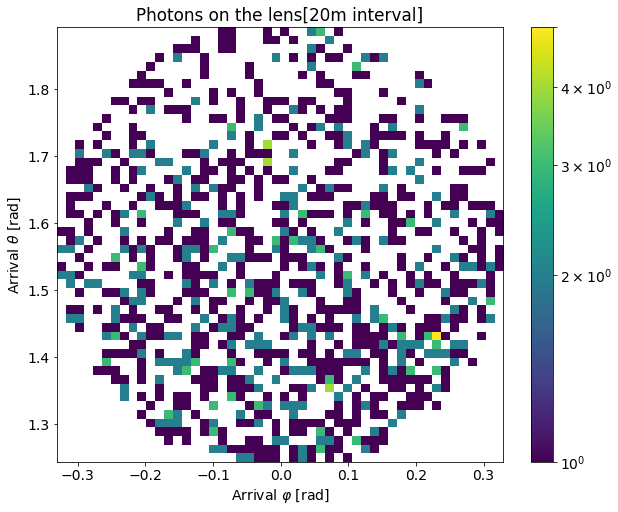

In [113]:
# fig, ax = plt.subplots(figsize=(12, 6))
# CS = plt.contour(test_angle.reshape(100, 100), levels = [half_opening_angle], extent=[-np.pi, np.pi, 0, np.pi])
CS = plt.contour(test_angle.reshape(100, 100).T, levels = [half_opening_angle], extent=[-np.pi, np.pi, 0, np.pi])
h = plt.hist2d(filtered_momentum[:,0], filtered_momentum[:,1], bins=50, norm=LogNorm());
plt.colorbar(h[3])
# plt.xlim([-np.pi, np.pi])
# plt.ylim([0, np.pi])
plt.xlabel("Arrival %s [rad]" % (r'$\varphi$'))
plt.ylabel("Arrival %s [rad]" % (r'$\theta$'))
plt.title('Photons on the lens[20m interval]')